In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
from plotnine import *
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler # z-score variable
from sklearn.metrics import mean_squared_error,r2_score # model evulation


Doğrusal regresyon bir çizgiye uyar ve sürekli bir değeri tahmin etmek için kullanılır. Örneğin, doğrusal regresyon kullanarak bir evin fiyatını tahmin ediyoruz . Bununla birlikte, lojistik regresyon,  s-şekilli ( sigmoid ) bir fonksiyona uyar ve bir şeyin doğru mu yanlış mı olduğunu tahmin eder. Esas olarak ikili sınıflandırma problemlerinde kullanılır . 

    -S: Neden ikili sınıflandırma için lojistik regresyon yerine doğrusal regresyon kullanılamıyor?
    
    -C: Doğrusal regresyonda çıktı süreklidir. İkili sınıflandırma durumunda, sürekli bir değerin çıktısı mantıklı değildir. İkili sınıflandırma problemleri için doğrusal regresyon 0 ve 1'in ötesine geçebilecek değerleri tahmin edebilir. Çıktıyı iki farklı sınıfa eşleştirilebilen olasılıklar şeklinde istiyorsak, aralığı 0 ve 1 ile sınırlandırılmalıdır. lojistik regresyon modeli, lojistik/sigmoid fonksiyonu ile olasılıklar üretebilir, lineer regresyona göre tercih edilir .

### Logistic Regression Theory- Linear to Logistic

- Lojistik Regresyon (Logit Regresyon) genellikle bir etiketin belirli bir sınıfa ait olma olasılığını değerlendirmek için kullanılır. Değerlendirilen olasılığın yüzde 50'den fazla olduğunu varsayarsak, model, etiketin o sınıfta bir yeri olduğunu, aksi takdirde bunun tersini tahmin eder. Bu onu ikili bir sınıflandırıcı yapar.

- Regresyonu araba fiyatları veya ev elektrik tüketimi gibi sürekli bir değer tahmincisi olarak görmüş olsak da, Lojistik regresyon sınıflandırma problemlerini çözmemize yardımcı olur. 

- İkili sınıflandırmada, 0 ve 1 olmak üzere iki sınıf vardır. İkili sınıflandırma problemlerine bazı örnekler:

    - Spam veya spam olmayan e-postalar
    - Evet veya Hayır sonuçları
    - Hasta veya hasta olmayan insanlar.
    
    
    
### Logistic Regression Theory- Maximum Likelihood

- Doğrusal regresyon oluşturmak için en küçük kareler yöntemi kullanılır ve uyumun performansı RMSE ve R-kare istatistikleri kullanılarak ölçülür. Lineer regresyondan farklı olarak , lojistik regresyonda kapalı form yaklaşımı yoktur ve model,  maksimum olabilirlik tahmini (MLE) kullanılarak uygun olmalıdır . Maksimum olabilirlik tahmin süreci, modelimizin gözlemlerle ne kadar aynı olduğunu bize verir. Lojistik regresyon denkleminin çıktısı 0 veya 1 değil, çıktısı 1 olan logaritmik olasılıkların bir tahminidir.  MLE, tahmin edilen log-oranların gözlemlenen sonucu daha iyi temsil ettiği bir çözüm arar.

- Bağımsız değişkenler söz konusu olduğunda, lojistik regresyon, bağımlı değişkeni bir logit değişkenine dönüştürerek maksimum olabilirlik tahminini kullanır. Bu şekilde, lojistik regresyon, belirli bir olayın meydana gelme olasılığını hesaplar. Merak ediyor olabilirsiniz, neden olasılık yerine oran veya log(oran) kullanıyoruz? Gerçekte, bu karşılaşabileceğiniz yaygın bir sorudur ve aşağıdaki denklemler bize hikayeyi anlatır:

- Olasılığı log'a (oranlara) çevirerek, spektrumu [0, 1]'den [- ∞, +∞ ]'ye genişlettik. Modeli olasılığa uydurursak, sınırlı bir aralık sorunuyla karşı karşıya kalırız ve log dönüşümü uygularsak, karşılık gelen doğrusal olmayanlığı kapsayabilir ve yine de doğrusal bir değişken kombinasyonuna sığabiliriz.



### Evaluating Performance-Classification Error Metrics

- İkili bir sınıflandırma modelinde, tahminimiz yalnızca iki sonuç alabilir:  doğru veya yanlış . Tahminlerimizin performansını ölçmek ve değerlendirmek için sınıflandırma hatası metriklerini kullanırız.

- The major classification metrics we'll learn in this lesson are:

    - Accuracy: The proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.
    - Recall: Also known as sensitivity. It is the fraction of relevant instances that were retrieved.
    - Precision: Also called positive predictive value. It is the fraction of relevant instances among the retrieved instances
    - F1-Score: The F1 score is the harmonic mean of the precision and recall.



### Confusion Matrix: 

- The classification metrics mentioned above (accuracy, precision, etc.) are generated from the confusion matrix. A confusion matrix is a frequently used table to describe the performance of a classification model on a series of test data where real values are known. 

### Receiver operating characteristic (ROC)curve:

- Bu, diskriminant eşiği değiştikçe ikili sınıflandırıcının performansını gösteren grafiksel bir çizimdir. Eğri, çeşitli eşik değerlerinde gerçek pozitif oranın (TPR) yanlış pozitif oranına (FPR) karşı çizilmesiyle oluşturulur.  



- Q: Why is accuracy not a good measure for classification problems?

- A: Accuracy is not a good measure for classification problems because it gives equal importance to both false positives and false negatives. However, this may not be the case in most business problems. For example, in case of cancer prediction, declaring cancer as benign is more serious than wrongly informing the patient that he is suffering from cancer. Accuracy gives equal importance to both cases and cannot differentiate between them.

- C: Doğruluk, hem yanlış pozitiflere hem de yanlış negatiflere eşit önem verdiği için sınıflandırma sorunları için iyi bir ölçü değildir. Ancak, çoğu iş probleminde durum böyle olmayabilir. Örneğin, kanser tahmini durumunda, kanseri iyi huylu olarak ilan etmek, hastayı kanserden muzdarip olduğu konusunda yanlış bilgilendirmekten daha ciddidir. Doğruluk, her iki duruma da eşit önem verir ve aralarında ayrım yapamaz.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
df.shape

(1310, 14)

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='survived', ylabel='count'>

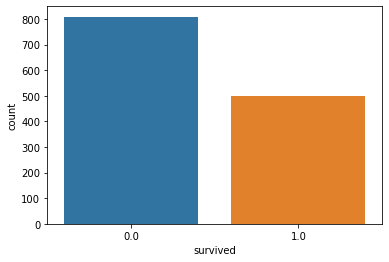

In [7]:
sns.countplot(x ="survived", data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

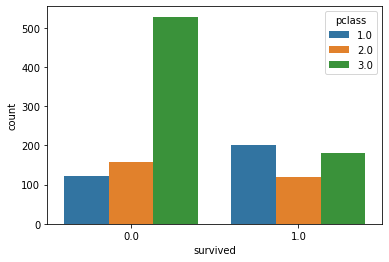

In [8]:
sns.countplot(x ="survived", data=df, hue="pclass")

<AxesSubplot:xlabel='survived', ylabel='count'>

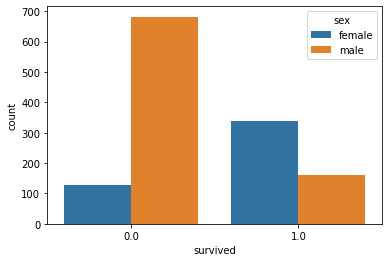

In [9]:
sns.countplot(x ="survived", data=df, hue="sex")

<AxesSubplot:ylabel='Frequency'>

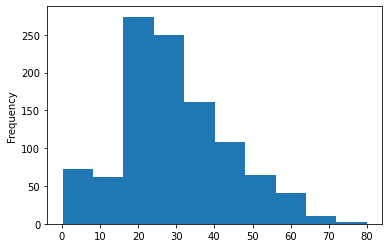

In [10]:
df.age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

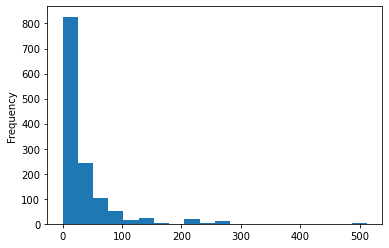

In [14]:
df["fare"].plot.hist(bins=20)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

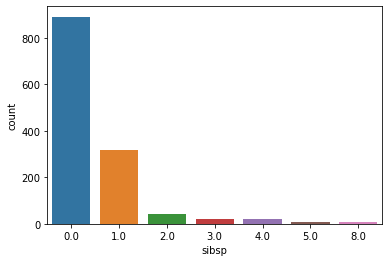

In [16]:
sns.countplot(x="sibsp", data=df)

In [18]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<AxesSubplot:>

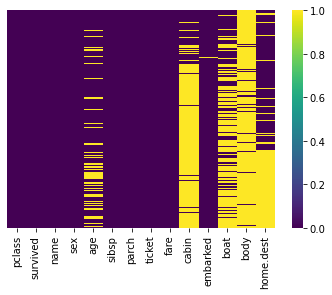

In [19]:
sns.heatmap(df.isnull(),yticklabels=False, cmap="viridis" )

In [20]:
df.drop(["cabin","boat", "body", "home.dest"], axis=1, inplace=True)

In [22]:
df.isnull().sum()

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [25]:
df.dtypes

pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

In [26]:
sex = pd.get_dummies(df.sex, drop_first=True)

In [27]:
embarked = pd.get_dummies(df.embarked, drop_first=True)

In [28]:
pclass = pd.get_dummies(df.pclass, drop_first=True)

In [29]:
df.drop(["sex","embarked","pclass"], axis = 1, inplace=True)

In [30]:
df = pd.concat([df,sex,embarked,pclass], axis=1)

In [31]:
df.dtypes

survived    float64
name         object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
male          uint8
Q             uint8
S             uint8
2.0           uint8
3.0           uint8
dtype: object

In [33]:
df.drop(["name","ticket"], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1043 non-null   float64
 1   age       1043 non-null   float64
 2   sibsp     1043 non-null   float64
 3   parch     1043 non-null   float64
 4   fare      1043 non-null   float64
 5   male      1043 non-null   uint8  
 6   Q         1043 non-null   uint8  
 7   S         1043 non-null   uint8  
 8   2.0       1043 non-null   uint8  
 9   3.0       1043 non-null   uint8  
dtypes: float64(5), uint8(5)
memory usage: 54.0 KB


In [35]:
df.head()

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [36]:
X = df.drop(["survived"], axis=1)
y= df.survived

In [ ]:
 from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=100)

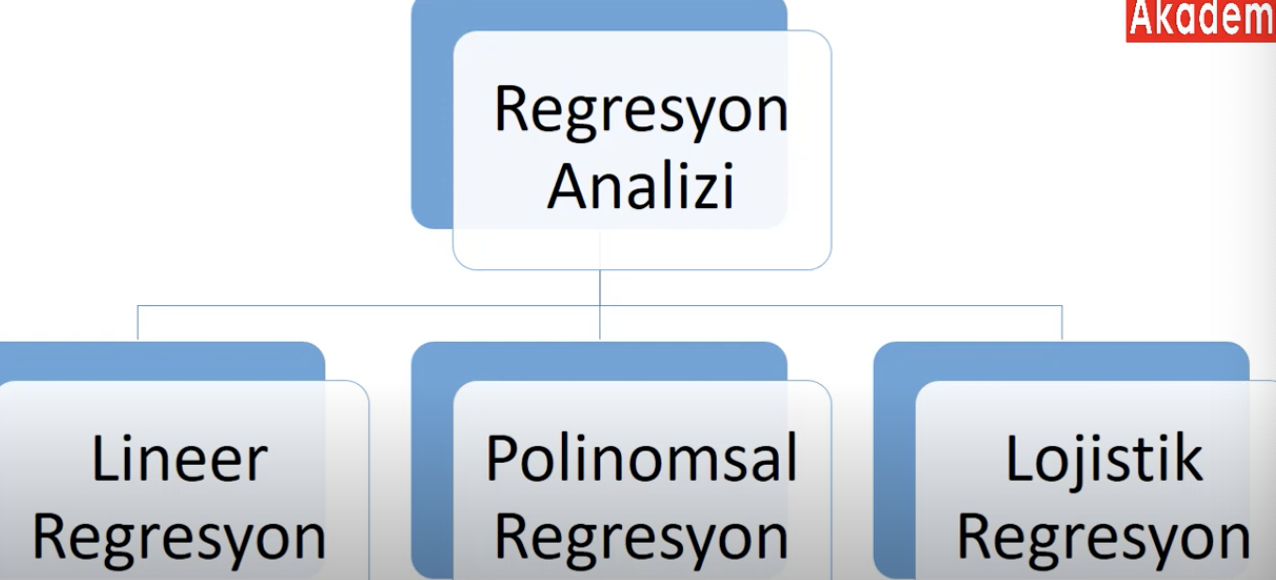
- Değişkenler arasında dorusal ilişki varsa  linear regg kullanırız.
- Hedef sayısal ama bagımsız değişkenlerde lineer ilişki yoksa polinimal regg kullanılır.
- Target kategorik oldugu için logistik regrasyonu kullanacagız.
        - Yarın hava sıcaklığı ne olabilir ? Linear regg.
        - Yarın hava yağmurlu mu değil mi ? Logistik regg


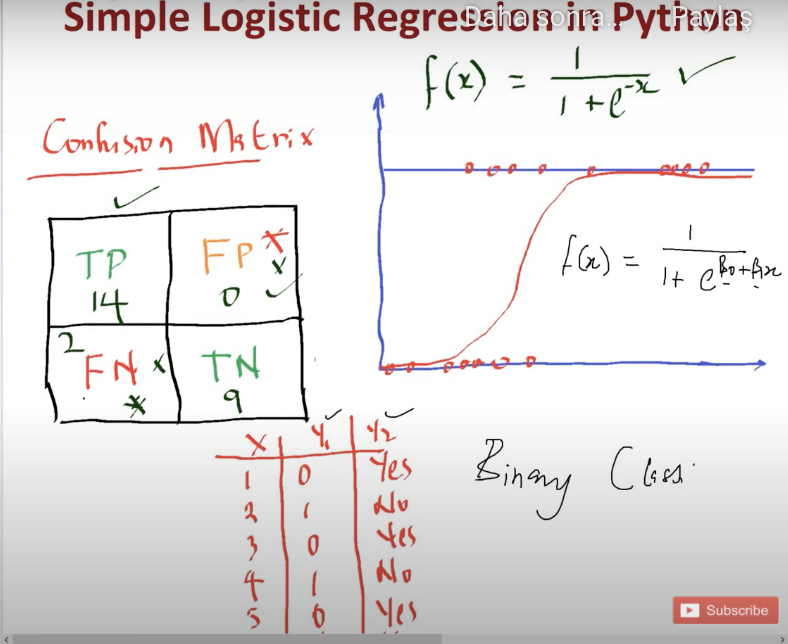       


In [42]:
from sklearn.linear_model import LogisticRegression

In [45]:
lg_model = LogisticRegression(max_iter=1000)

In [46]:
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
lg_model.score(X_test,y_test)
# kurdugumuz model yeni veriyi % 70 oranında doğru tahmin yapıcak.

0.7701149425287356

In [48]:
lg_model.score(X_train, y_train)
# skorlar yakın değil overfitting durumu var.
# reguleştirmek için C değerini değiştiririz.

0.8069053708439897

In [50]:
lg_model = LogisticRegression(C=0.1 ,max_iter=1000)
lg_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [51]:
print(lg_model.score(X_test,y_test))
print(lg_model.score(X_train,y_train))

0.7816091954022989
0.7953964194373402


In [52]:
# model evoulatin

from sklearn.metrics import confusion_matrix

In [53]:
pred = lg_model.predict(X_test) 

In [54]:
confusion_matrix(y_test, pred)

array([[124,  21],
       [ 36,  80]])

In [55]:
df.head()

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [58]:
import numpy as np
new_df = np.array([[29,0,0,211.3375,0,0,1,0,0]])

In [59]:
lg_model.predict(new_df)

# gercekte 1. değer demekki model doğru tahmin yaptı.

array([1.])

In [60]:
lg_model.coef_

array([[-0.03164232, -0.31943626,  0.06662294,  0.00648457, -1.80583853,
        -0.41890525, -0.37302095, -0.17972348, -1.02552681]])

In [62]:
new_df1 = np.array([[30,1,1,150,0,0,1,0,0]])

In [63]:
lg_model.predict(new_df1) 

# Bu kişi de hayatta kalıyor :)) 

array([1.])

In [ ]:
###########################################3

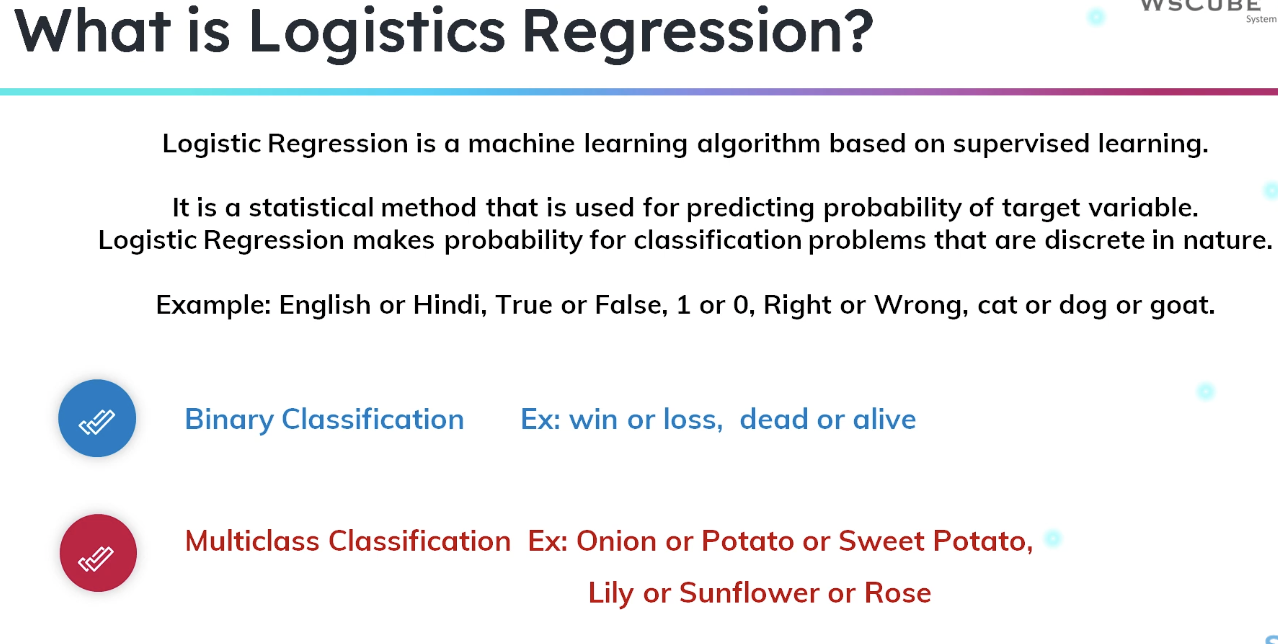


In [64]:
import pandas as pd

In [66]:
df = pd.read_csv("Iris.csv")

In [67]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# target Species ve kategorik.

In [68]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [70]:
df.Species.replace({'Iris-setosa':"1", 'Iris-versicolor':"2", 'Iris-virginica':"3"}, inplace=True)

In [71]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df[["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],df.Species, test_size=0.2)

In [74]:
len(X_train)

120

In [75]:
len(X_test)

30

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression()

In [78]:
lr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
lr.predict(X_test)

array(['2', '1', '2', '2', '3', '2', '3', '2', '1', '3', '1', '3', '1',
       '3', '2', '1', '2', '2', '3', '1', '2', '1', '1', '3', '3', '1',
       '2', '2', '1', '1'], dtype=object)

In [81]:
X_test # {'Iris-setosa':"1", 'Iris-versicolor':"2", 'Iris-virginica':"3"}

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,83,5.8,2.7,3.9,1.2
12,13,4.8,3.0,1.4,0.1
86,87,6.7,3.1,4.7,1.5
65,66,6.7,3.1,4.4,1.4
104,105,6.5,3.0,5.8,2.2
64,65,5.6,2.9,3.6,1.3
148,149,6.2,3.4,5.4,2.3
94,95,5.6,2.7,4.2,1.3
33,34,5.5,4.2,1.4,0.2
112,113,6.8,3.0,5.5,2.1


In [82]:
lr.score(X_test,y_test)

1.0

In [83]:
import seaborn as sns 

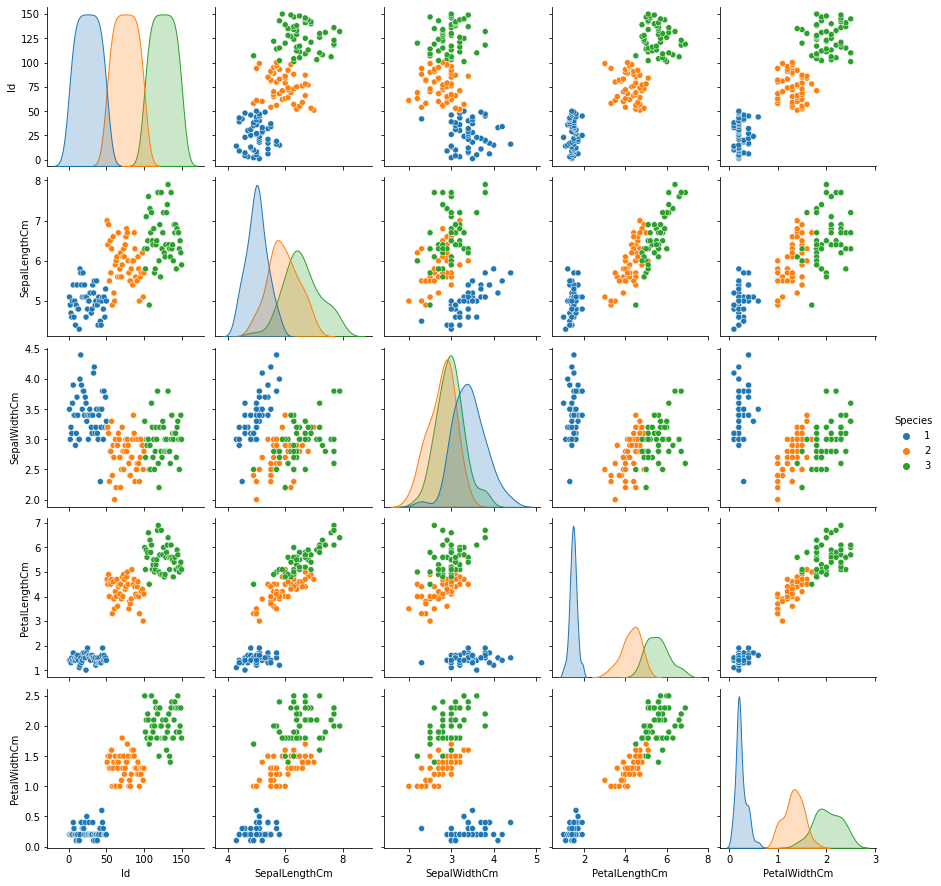

In [84]:
sns.pairplot(df[["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]],hue="Species")